# Allstate claims severity

## Introduction

- Allstate is a personal insurer in United State, continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.
- Allstate wish to  develop automated methods of predicting the cost, and hence severity, of claims.
- Particularly this problem deals with predicting the claims severity pertaining to car insurance. 

## Business problem

Definition of claim severity : It is the measure of loss to insurance company associated with an insurance claim made by a customer.
- An insurance company tries to minimize the average claim severity over all claims for the period in consideration.
- By the measure of claim severity insurance company gets an idea about the risk associated with the insurance.
- By fast and accurate prediction of claim severity insurance company would be able to make faster decision whether to provide insurance to a person based on the risk factor.
- Claim severity would also serve the purpose of deciding the cost of insurance for a customer as per his/her details.
- It will reduce the operation cost and time and also provide better customer experience.

## Machine Leaning problem

- Independent variables : Mixture of categorical and numerical features.
- Dependent variable: A numerical value (loss)

**This is a regression problem** <br><br>
The performance metric we will use here is mean absolute error (MAE) between actual loss and predict loss.

## Dataset overview

Some high level observations about the dataset given are :
- There are 116 categorical features named as cat1, cat2, cat3 ...... cat116
- There are 14 real valued features named as cont1, cont2, cont3...... cont14
- One target variable named as loss.

## Exploratory Data Analysis (EDA)

### Importing libraries and modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from category_encoders.binary import BinaryEncoder
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")


### Importing the dataset

In [27]:
data_df = pd.read_csv('train.csv')
print('Shape: ',data_df.shape)
print('Columns: ',data_df.columns.values)
data_df.head()

Shape:  (188318, 132)
Columns:  ['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


### Train test split

In [28]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
data_tr , data_te = train_test_split(data_df, test_size=0.2,shuffle=True,random_state=20)

X_train = data_tr.drop(['id', 'loss'], axis=1)
y_train = data_tr['loss'].values

X_test = data_te.drop(['id', 'loss'], axis=1)
y_test = data_te['loss'].values

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (150654, 130)
X_test shape:  (37664, 130)
y_train shape:  (150654,)
y_test shape:  (37664,)


Question: Does training data have any null values?

In [29]:
X_train.isnull().any().any()

False

Training data have no null values.

### Visualizing target variable : loss

*Plotting the probability density function*

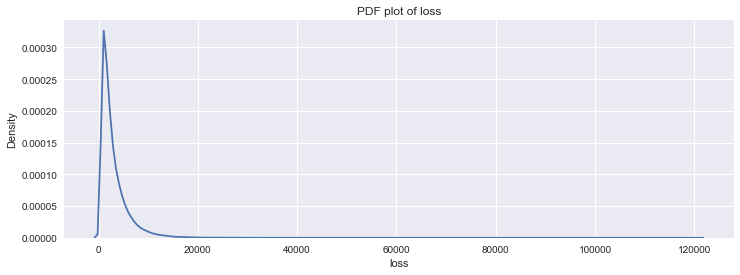

In [5]:
plt.figure(figsize=(12,4))
plt.title('PDF plot of loss')
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
sns.kdeplot(x='loss',data=data_tr)
plt.show()

- Distribution of target variable has a high right skew.
- Majority of data has loss below 10000.

*Plotting cumulative distribution function*

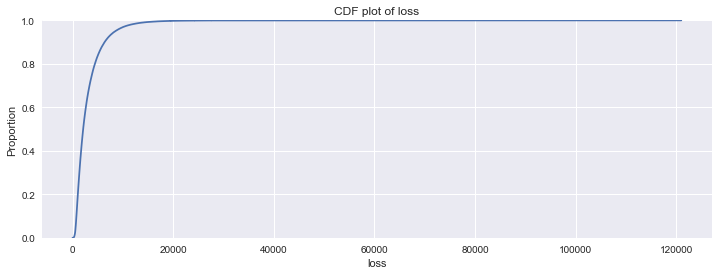

Minimim value of loss:  5.25
Maximum value of loss:  121012.25
95 percentile of loss: 8487.69


In [6]:
plt.figure(figsize=(12,4))
plt.title('CDF plot of loss')
# https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot
sns.ecdfplot(x='loss',data=data_tr)
plt.show()
print('Minimim value of loss: ',y_train.min())
print('Maximum value of loss: ',y_train.max())

print('95 percentile of loss: %.2f'%np.percentile(y_train,95))

*Creating two data frames one having categorical features and other having numerical features*

In [30]:
cat_feature_df = X_train.select_dtypes(include='object')
num_feature_df = X_train.select_dtypes(include='float')
print('Catgorical features count: ',cat_feature_df.shape[1])
print('Numerical features count: ',num_feature_df.shape[1])

Catgorical features count:  116
Numerical features count:  14


**Statistics for numerical features**

In [31]:
num_feature_df.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000
mean,0.494049,0.507435,0.499103,0.491998,0.487148,0.491374,0.485165,0.487029,0.485743,0.498448,0.493673,0.493330,0.493635,0.495807
std,0.187799,0.207196,0.202258,0.211309,0.209040,0.205303,0.178342,0.199448,0.181963,0.185968,0.209756,0.209442,0.212819,0.222508
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.180268
25%,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.317960,0.358970,0.364580,0.310961,0.314945,0.315758,0.294758
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438771,0.441060,0.437310,0.461190,0.457203,0.462286,0.363547,0.408570
75%,0.623912,0.681761,0.634224,0.652072,0.635304,0.655553,0.591045,0.623580,0.568890,0.619840,0.678924,0.679096,0.689974,0.724610
max,0.984975,0.862654,0.944251,0.952482,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


- Numerical features lies between 0 and 1
- Mean of all features close to 0.5
- Standard deviation of all features is about 0.2

**Statistics for categorical features**

In [32]:
#https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-part-2
cat_stats = pd.DataFrame(
    columns=['column', 'unique_values', 'unique_value_count', 'nan_count'])

for c in cat_feature_df.columns:
    tmp = pd.DataFrame()
    tmp['column'] = [c]
    tmp['unique_values'] = [cat_feature_df[c].unique()]
    tmp['unique_value_count'] = int(cat_feature_df[c].nunique())
    tmp['nan_count'] = cat_feature_df[c].isnull().sum()
    cat_stats = cat_stats.append(tmp, ignore_index=True)
cat_stats.head()

,column,unique_values,unique_value_count,nan_count
0,cat1,"[B, A]",2,0
1,cat2,"[A, B]",2,0
2,cat3,"[A, B]",2,0
3,cat4,"[A, B]",2,0
4,cat5,"[B, A]",2,0


Above data frame holds the name, unique values and unique values count for every categorical feature. 

**Plotting a cdf plot of unique value counts of categorical features**

95 percentile of unique_value_count: 20 


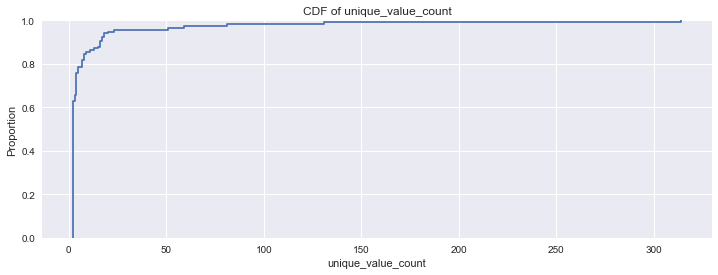

In [33]:
plt.figure(figsize=(12,4))
plt.title('CDF of unique_value_count')
# https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot
sns.ecdfplot(x='unique_value_count' ,data=cat_stats)
print('95 percentile of unique_value_count: %d ' %np.percentile(cat_stats['unique_value_count'],95))

Only 5 percent features have cardinality more than 20.

### Encoding of categorical features

- *Since we have total 116 categorical features, it is very hard to perform EDA on each of them. We will pick 15 most important features which help to predict that target variable using feature selection technique.*
- *To apply feature selection technique it is required to encode our categorical features to numerical values.*

**Picking features for one hot encoding**

In [34]:
cat_stat_lt5 = cat_stats[cat_stats['unique_value_count']<5]
one_hot_cols = cat_stat_lt5['column'].values
print('Categorical fetaure for one hot encoding: \n',one_hot_cols)

Categorical fetaure for one hot encoding: 
 ['cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9' 'cat10'
 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18' 'cat19'
 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27' 'cat28'
 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36' 'cat37'
 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45' 'cat46'
 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54' 'cat55'
 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63' 'cat64'
 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72' 'cat73'
 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81' 'cat82'
 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88']


- We have picked the features having cardinality less than 5 for one hot encoding.
- One hot encoding is suitable if cardinality of feature is low

**Plotting bar plot for features having cardinality(c) more than or equal to 5**

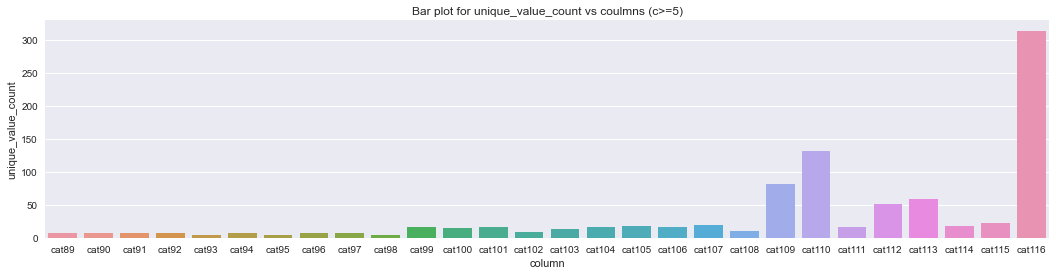

In [35]:
plt.figure(figsize=(18,4))
plt.title('Bar plot for unique_value_count vs coulmns (c>=5)')
cat_stat_ge5 = cat_stats[cat_stats['unique_value_count']>=5]
# https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
sns.barplot(x='column',y='unique_value_count',data=cat_stat_ge5)
plt.show()

- Most of the columns have cardinality less than 50. 
- cat109, cat110, cat112, cat113, cat116 have cardinality more than or equal to 50.
- cat116 has very high cardinality which is more than 300.

**Picking features for binary encoding**

In [36]:
cat_stat_5t32 = cat_stats[(cat_stats['unique_value_count'] >=5) & (cat_stats['unique_value_count'] <=32)]
binary_encoding_cols = cat_stat_5t32['column'].values
print('Categorical fetaure for binary encoding:\n',binary_encoding_cols)

Categorical fetaure for binary encoding:
 ['cat89' 'cat90' 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97'
 'cat98' 'cat99' 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105'
 'cat106' 'cat107' 'cat108' 'cat111' 'cat114' 'cat115']


- Binary encoding encode the feature with cardinality 'c' into ceil(log2(c)) number of features.
- Here binary encoding will result in features of length 3 to 5.

**Picking features for target encoding**

In [37]:
cat_stat_gt32 = cat_stats[cat_stats['unique_value_count']>32]
target_encoding_cols = cat_stat_gt32['column'].values
print('Categorical fetaure for target encoding: ',target_encoding_cols)

Categorical fetaure for target encoding:  ['cat109' 'cat110' 'cat112' 'cat113' 'cat116']


- Features with high cardinality are picked for target encoding
- Target encoding is prone to over-fitting. Hence we will take care of regularization.

*Applying one hot encoding to one_hot_cols*

In [38]:
one_hot_encoder = OneHotEncoder(cols=one_hot_cols)
one_hot_encoder.fit(X_train)
X_train_one_hot = one_hot_encoder.transform(X_train)

*Applying binary encoding to binary_encoding_cols*

In [39]:
bin_encoder = BinaryEncoder(cols=binary_encoding_cols)
bin_encoder.fit(X_train_one_hot)
X_train_bin = bin_encoder.transform(X_train_one_hot)

*Applying target encoding to target_encoding_cols*

In [40]:
y_train_tfmd = np.log(y_train)
target_encoder = TargetEncoder(
    cols=target_encoding_cols, min_samples_leaf=10, smoothing=10.0)
target_encoder.fit(X_train_bin, y_train_tfmd)
X_train_tar = target_encoder.transform(X_train_bin)

**Data frame after categorical encoding**

In [41]:
X_train_tar.head(3)

,cat1_1,cat1_2,cat2_1,cat2_2,cat3_1,cat3_2,cat4_1,cat4_2,cat5_1,cat5_2,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
69757,1,0,1,0,1,0,1,0,1,0,...,0.281143,0.655021,0.481161,0.45883,0.76280,0.51111,0.682315,0.669033,0.723122,0.679136
77241,0,1,0,1,1,0,1,0,1,0,...,0.281143,0.829824,0.757347,0.82598,0.58325,0.79863,0.784967,0.772574,0.862949,0.701420
59852,0,1,0,1,1,0,0,1,1,0,...,0.551723,0.456946,0.589494,0.31280,0.44352,0.53328,0.771508,0.758883,0.336261,0.313226


### Selection of top features

*We are using DecisionTreeRegressor for feature selection*

In [42]:
from sklearn.tree import DecisionTreeRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
model = DecisionTreeRegressor(random_state=10)
model.fit(X_train_tar, y_train_tfmd)
importance = model.feature_importances_
feature_score_dict = dict(zip(X_train_tar.columns.values, importance))
feature_score_dict = dict(
    sorted(feature_score_dict.items(), key=lambda x: x[1], reverse=True))

- DecisionTreeRegressor calculates the feature importance based on information gain due to a particular feature.
- DecisionTreeRegressor result is not affected by non-linear features.

**Plotting the feature importance CDF**

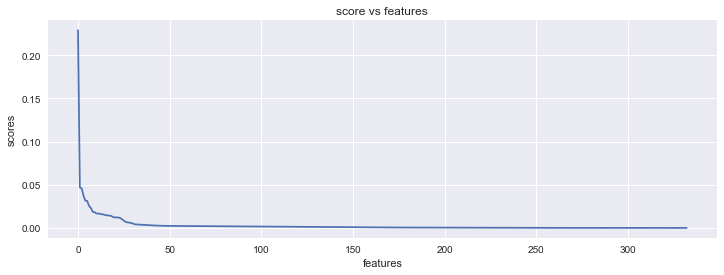

In [43]:
plt.figure(figsize=(12,4))
plt.title('score vs features')
plt.plot(list(feature_score_dict.values()))
plt.xlabel('features')
plt.ylabel('scores')
plt.show()

*We will sort feature importance scores in descending order and pick the top 15 features.*

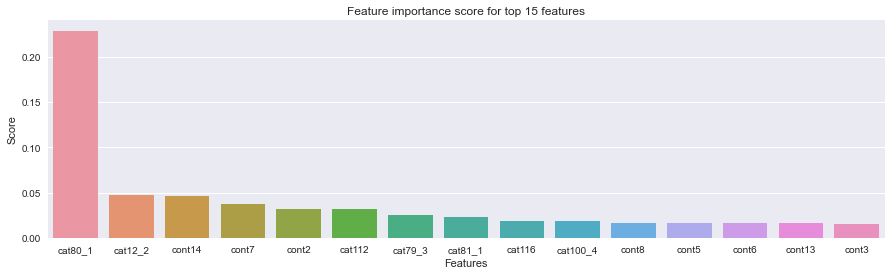

In [44]:
plt.figure(figsize=(15, 4))
plt.title('Feature importance score for top 15 features')
# https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
sns.barplot(
    x=list(feature_score_dict.keys())[:15], y=list(feature_score_dict.values())[:15])
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

- cat80 has highest feature importance score.
- Among top 15 features, 7 are categorical and 8 are numerical.

*We will perform EDA on original (non-transformed) features based on the top 15 features*

In [45]:
original_features = list(e.split('_')[0]  for e in list(feature_score_dict.keys())[:15])
top_cat_features = [e for e in original_features if 'cat' in e]
top_num_features = [e for e in original_features if 'cont' in e]

print('Top 15 original features: \n', original_features)
print('Top categorical features: ', top_cat_features)
print('Top numerical features: ', top_num_features)

Top 15 original features: 
 ['cat80', 'cat12', 'cont14', 'cont7', 'cont2', 'cat112', 'cat79', 'cat81', 'cat116', 'cat100', 'cont8', 'cont5', 'cont6', 'cont13', 'cont3']
Top categorical features:  ['cat80', 'cat12', 'cat112', 'cat79', 'cat81', 'cat116', 'cat100']
Top numerical features:  ['cont14', 'cont7', 'cont2', 'cont8', 'cont5', 'cont6', 'cont13', 'cont3']


In [46]:
def cat_order(category):
    return data_tr[category].value_counts().keys()

### EDA on categorical features

In [ ]:

def plot_categorical(feature):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Plots for {}'.format(feature))
    ax[0].set_title('count vs category plot')
#     https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
    sns.countplot(x=feature, data=data_tr, order=cat_order(feature), ax=ax[0])
    ax[1].set_title('loss vs category bar plot')
#     https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
    sns.barplot(x=feature, y='loss', data=data_tr, order=cat_order(feature), estimator=np.mean, ax=ax[1])
    ax[2].set_title('loss vs category box plot')
#     https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
    sns.boxplot(x=feature, y='loss', data=data_tr, order=cat_order(feature), ax=ax[2])
    plt.show()

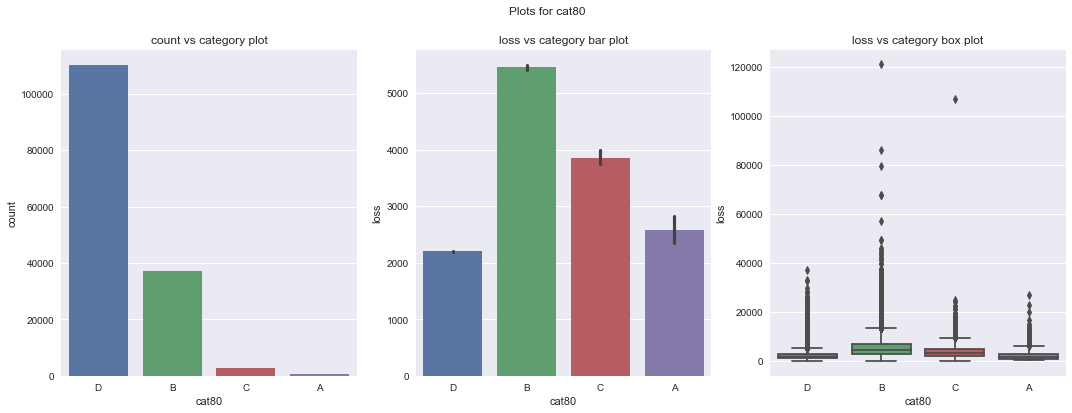

In [ ]:
plot_categorical('cat80')

- Frequency of categories in unbalanced for cat80.
- D has major count and it corresponds to mean loss of 2000.
- Mean loss against each category of cat80 lies between 2000 and 6000

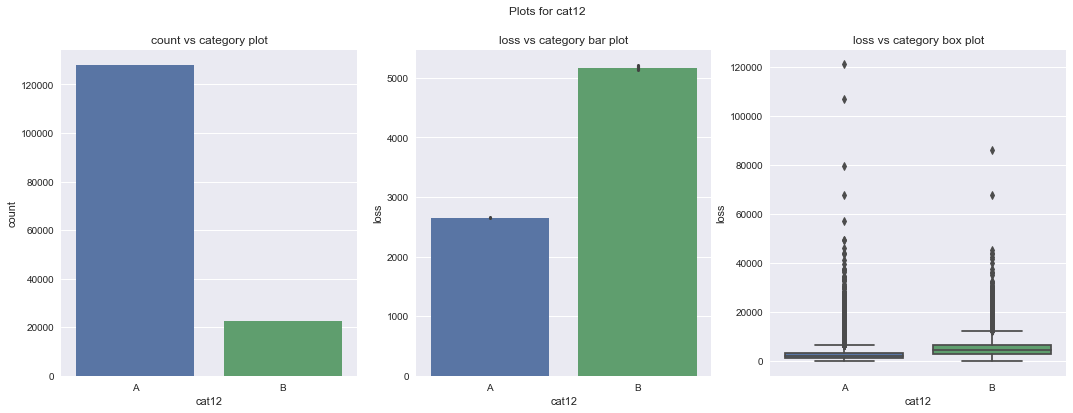

In [ ]:
plot_categorical('cat12')

- Count of B category is much high as compared to all others.
- B corresponds to mean loss of 2500. Since count of B very high corresponding loss will contribute the model more.
- All categories have high no of outliers of mean loss.

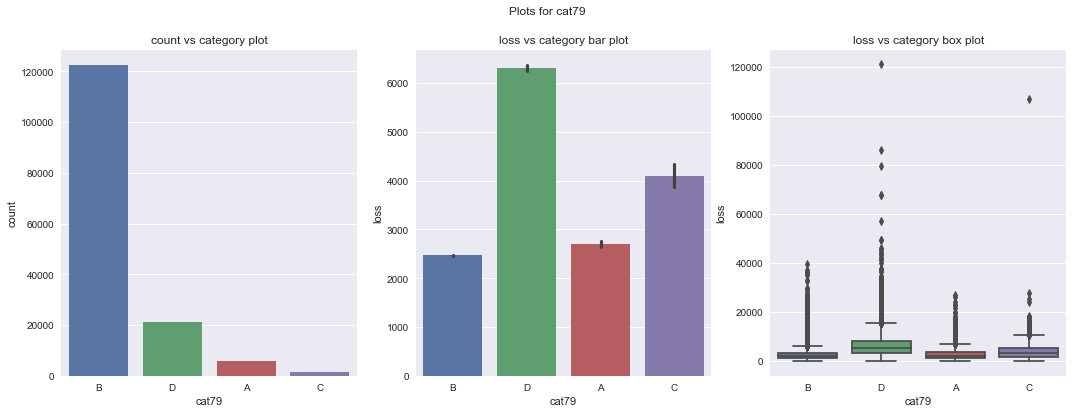

In [ ]:
plot_categorical('cat79')

- Count of A category is much high as compared to B.
- B corresponds to mean loss of 2500. Since count of B very high corresponding loss will contribute the model more.
- Both categories have high no of outliers of mean loss.

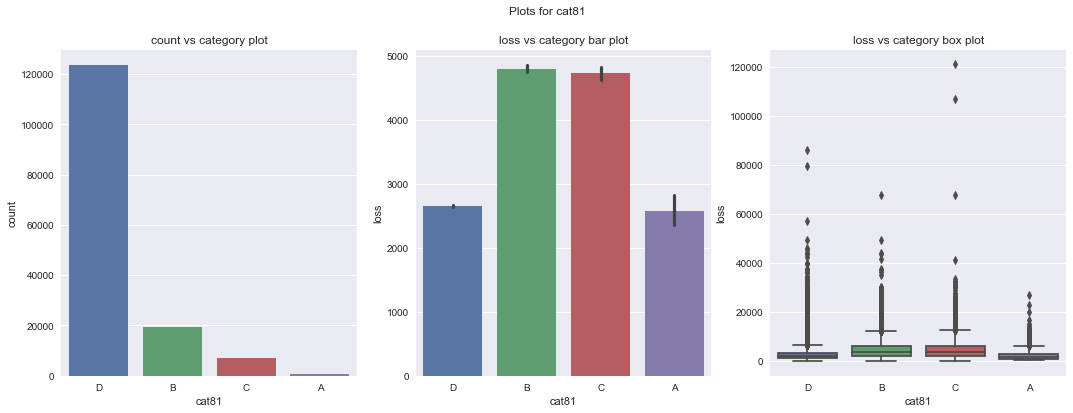

In [ ]:
plot_categorical('cat81')

- Count of D category is much high as compared to others.
- D corresponds to mean loss of 2500. Since count of D very high corresponding loss will contribute the model more.
- All categories have high no of outliers of mean loss.

**Comparing count vs category plot of above features**

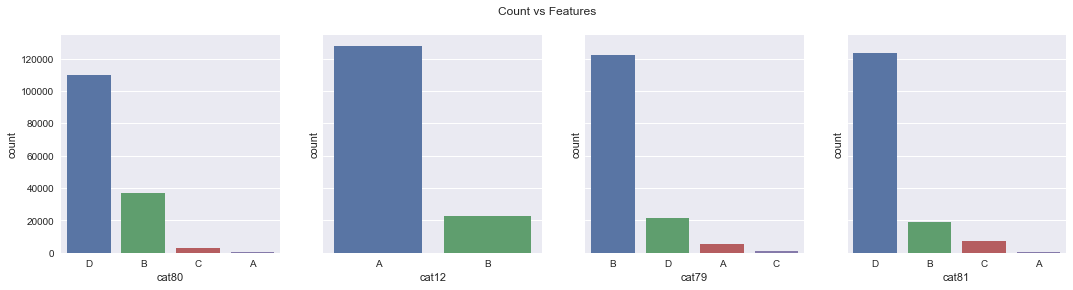

In [ ]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(18, 4))
# y-axis is shared among plots
fig.suptitle('Count vs Features')
categories=['cat80', 'cat12', 'cat79', 'cat81']
for i in range(4):
    sns.countplot(x=categories[i], data=data_tr, order=cat_order(categories[i]),ax=ax[i])
plt.show()

- Count of values is among all features is highly unbalanced. 
- One category dominates all others.

**Comparing loss vs category bar plot of above features**

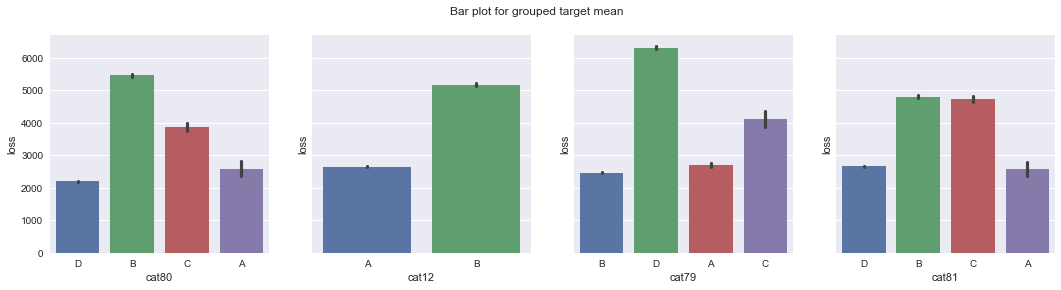

In [ ]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(18, 4))
fig.suptitle('Bar plot for grouped target mean')
# https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
categories = ['cat80', 'cat12', 'cat79', 'cat81']
for i in range(4):
    sns.barplot(x=categories[i], y='loss', data=data_tr,
                estimator=np.mean, order=cat_order(categories[i]), ax=ax[i])
plt.show()

- Mean loss vs category is unbalanced which is good thing for model.
- Mean loss corresponding to highly frequent categories lies around 2000. Hence they point to lower loss.
- Less frequent categories corresponds to higher loss.

**Comparing loss vs category box plot of above features**

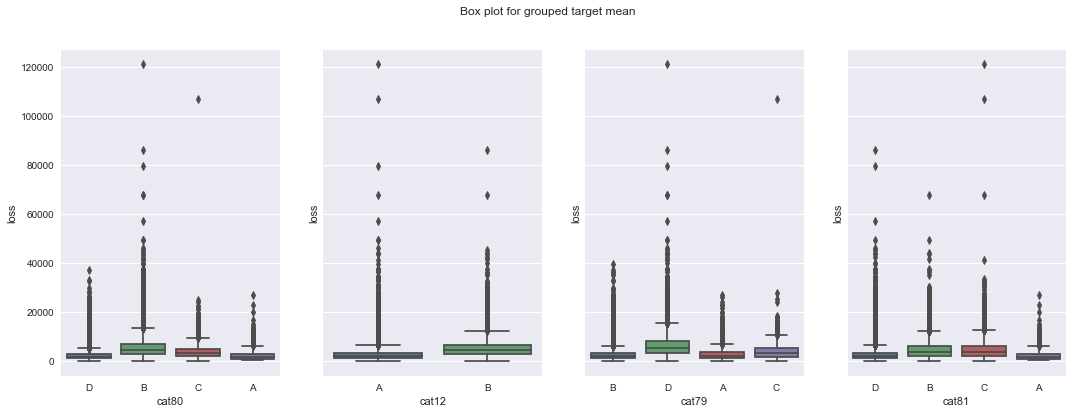

In [ ]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
fig.suptitle('Box plot for grouped target mean')
# https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
categories = ['cat80', 'cat12', 'cat79', 'cat81']
for i in range(4):
    sns.boxplot(x=categories[i], y='loss', data=data_tr,
                order=cat_order(categories[i]), ax=ax[i])
plt.show()

- Loss values quantiles for high frequent categories lies a lower values.
- We can see lot of outliers with high loss in every feature.

*Since cat100, cat112 and cat116 has high cardinality we are plotting them seprately*

**Plotting for cat100**

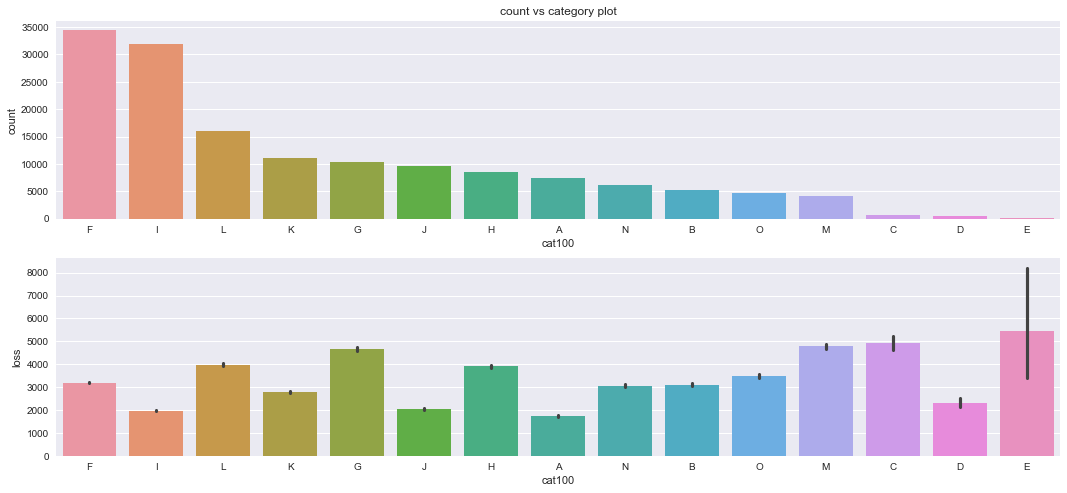

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(18,8))
ax1.set_title('count vs category plot')
sns.countplot(x='cat100',data=data_tr,order=cat_order('cat100'),ax=ax1)
sns.barplot(x='cat100', y='loss',data=data_tr,order=cat_order('cat100'), estimator=np.mean,ax=ax2)
plt.show()

- Frequency distribution of categories has variance. Contributes in better prediction of loss.
- Categories with high frequency corresponds to lower loss.
- Less frequent categories corresponds to higher loss.

**Plotting for cat112**

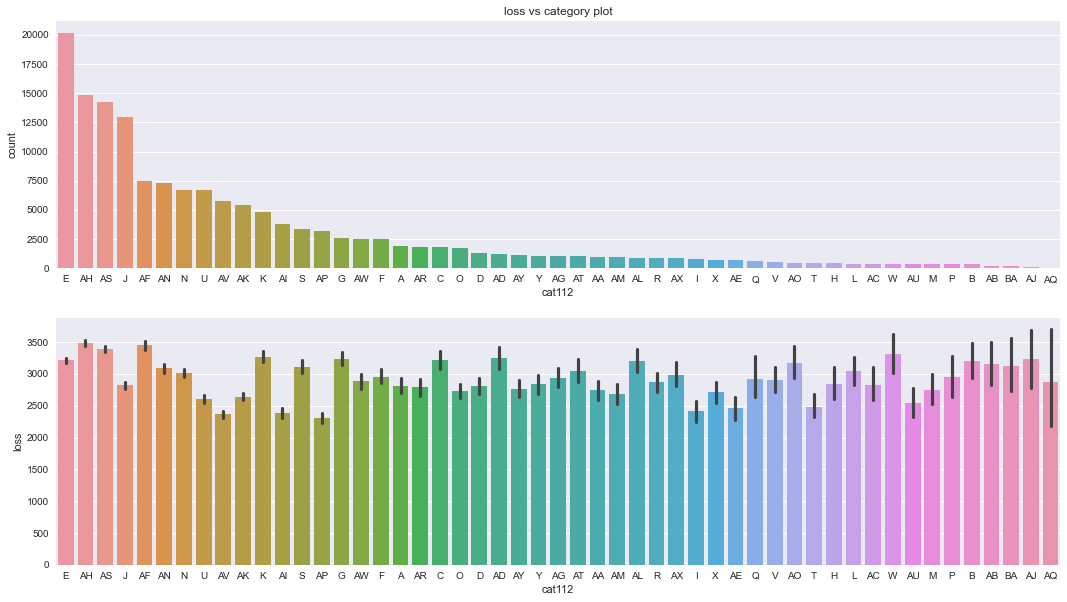

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(18,10))

ax1.set_title('count vs category plot')
# https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
sns.countplot(x='cat112',data=data_tr,order=cat_order('cat112'),ax=ax1)

ax1.set_title('loss vs category plot')
# https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
sns.barplot(x='cat112', y='loss',data=data_tr,order=cat_order('cat112'), estimator=np.mean,ax=ax2)
plt.show()

- Frequency distribution of categories has variance.
- Loss per category is somewhat uniform. Not useful for prediction.

**Plotting for cat116**

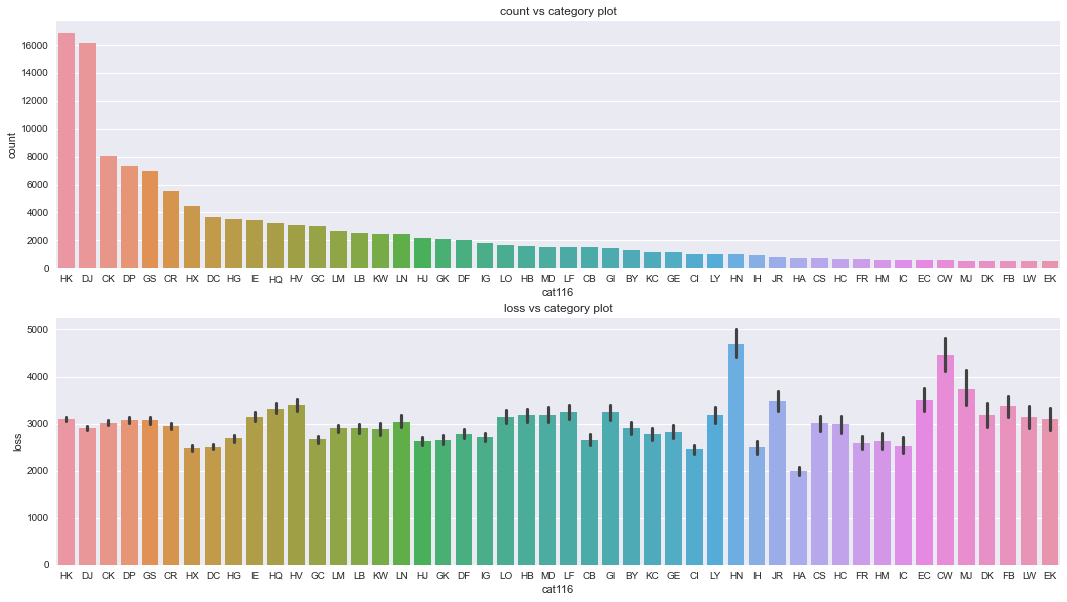

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))
vc = data_tr['cat116'].value_counts()
vc_key = vc[vc > 500].index
data_temp = data_tr[data_tr['cat116'].isin(vc_key)].copy()

ax1.set_title('count vs category plot')
# https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
sns.countplot(x='cat116', data=data_temp, order=vc_key, ax=ax1)
ax2.set_title('loss vs category plot')
# https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
sns.barplot(x='cat116', y='loss', data=data_temp,
            order=vc_key, estimator=np.mean, ax=ax2)
plt.show()
del data_temp

- Frequency distribution of categories have variance.
- Loss per category is somewhat uniform. Not useful for prediction.
- Few categories have very high loss.

*Function to get Cramers test values*

In [ ]:
import scipy.stats as ss
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

**Plotting co-relation heatmap for categorical features**

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.68it/s]


<AxesSubplot:>

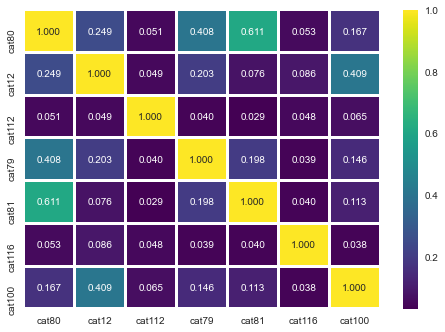

In [ ]:
categories = top_cat_features
corr_matrix = []
for cat1 in tqdm(categories):
    corr = []
    for cat2 in categories:
        corr.append(cramers_v(data_tr[cat1], data_tr[cat2]))
    corr_matrix.append(corr)
sns.heatmap(np.array(corr_matrix), annot=True, cmap='viridis', linewidths=2, fmt='.3f',
            xticklabels=categories, yticklabels=categories)

- (cat80,cat81) (cat12,cat100) (cat80,cat79) have high co-relation.

### EDA on numerical features

**Analyzing distribution of numerical features**

*Here features are plotted in order of their feature importance*

In [ ]:
 print('top_num_features',top_num_features)

top_num_features ['cont14', 'cont7', 'cont2', 'cont8', 'cont5', 'cont6', 'cont13', 'cont3']


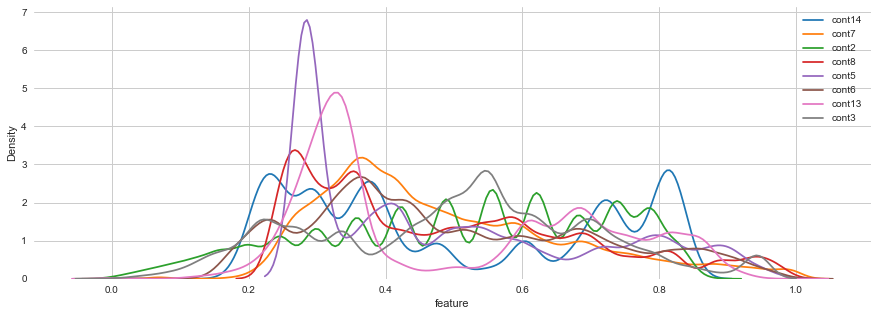

In [ ]:
from matplotlib.colors import Colormap as cm
sns.set_style('whitegrid')
sns.set_palette("tab10")
plt.figure(figsize=(15,5))
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
for i in range(len(top_num_features)):
    g = sns.kdeplot(x=top_num_features[i],data=data_tr,label=top_num_features[i])
plt.xlabel('feature') 

plt.legend()
plt.show()

- Most of the distribution is more like uniform.
- cont5, cont13 is highly non uniform with a skew. Hence its feature importance in low.

**Plotting the coorelation heatmap**

<AxesSubplot:>

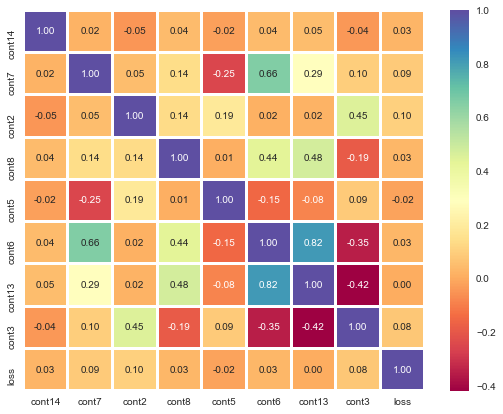

In [ ]:
cont_df = X_train[top_num_features].copy()
cont_df['loss'] = y_train_tfmd 
plt.figure(figsize=(9,7))
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
sns.heatmap(cont_df.corr(),annot=True,cmap='Spectral',linewidths=2,fmt='.2f')

- (cont13,cont6) (cont6,cont7) has high co-relation.
- cont7, cont2  has higher co-relation with loss which supports their feature importance.
- cont14 has less co-relation with loss but its importance is high for some reason.

**Plotting regression plot among numerical features and loss**

- *Here we will do regression plot between continuous features and target loss*
- *Here our numerical feature are divided in bins. Loss is plotted in log-scale.*
- *Each vertical stick has mid point as mean and its length tell the confidence interval of the x_bin*
- *Faded region show the confidence interval of calculated n_boot samples*
- *Since number of data points is very large we will randomly pick 1/50th of total train points for our plots.*

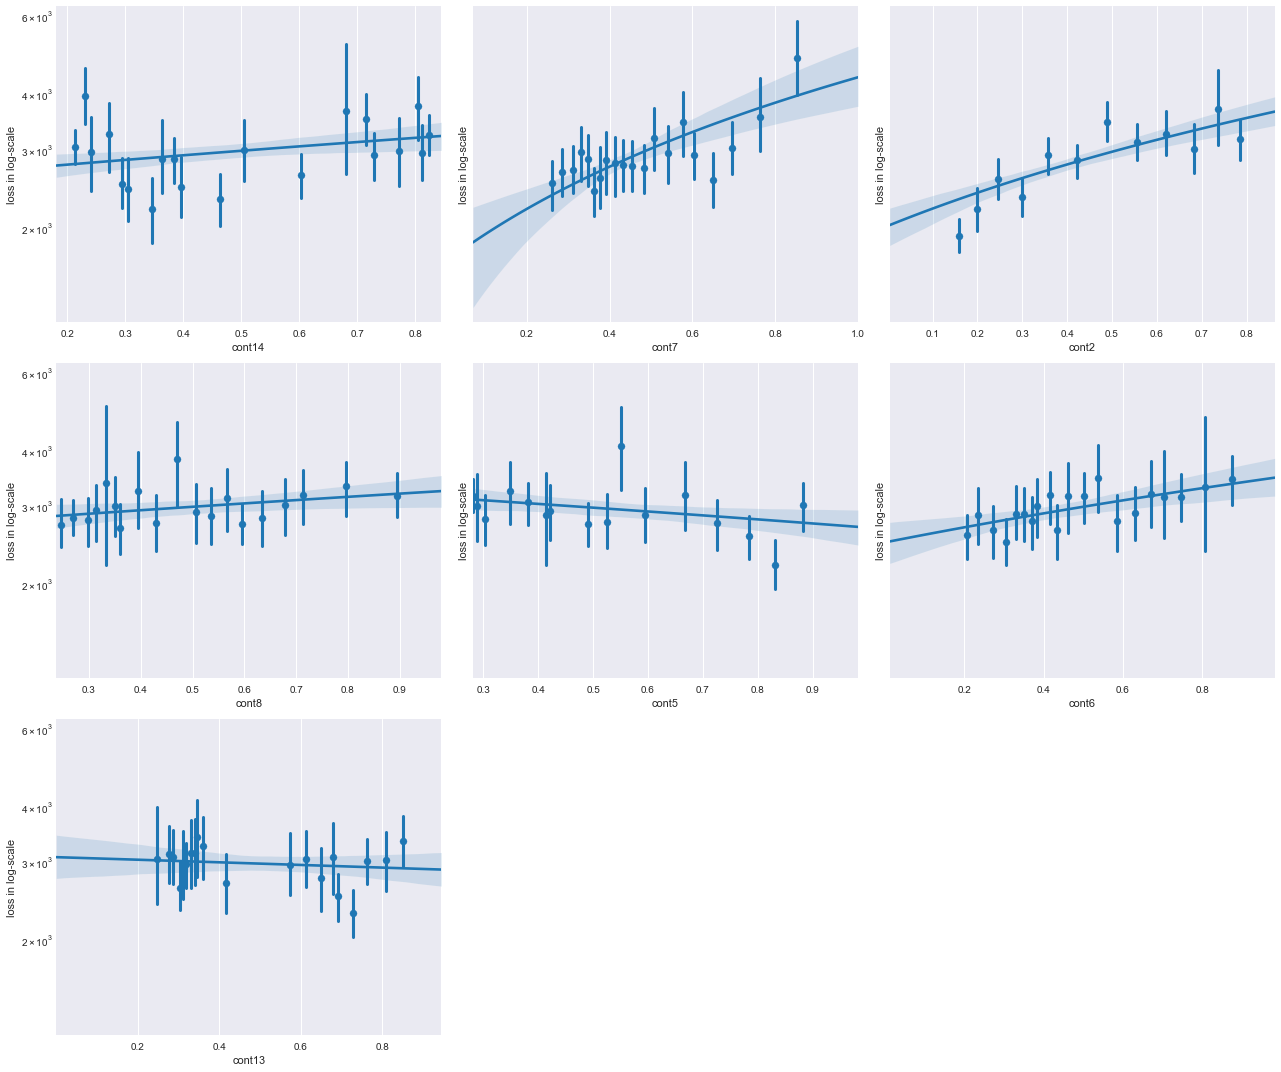

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot
max_num = data_tr.shape[0]
size = int(data_tr.shape[0]/50)
random_index = [int(i) for i in np.random.uniform(0, max_num, size)]

data_sample = data_tr.iloc[random_index, :]
sns.set_style('darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(18, 15), sharey=True)

k = 0
for i in range(3):
    for j in range(3):
        if k == 7:
            break
        sns.regplot(x=top_num_features[k], y='loss', data=data_sample,
                    x_estimator=np.mean, x_bins=20, x_ci=95, n_boot=500, ax=ax[i][j])

        ax[i][j].set_yscale('log')
        ax[i][j].set_ylabel('loss in log-scale')
        k += 1
fig.tight_layout()
ax[2][1].remove()
ax[2][2].remove()
plt.show()

- Regression line for cont7, cont2 has nice positive slope which supports their higher co-relation result and their higher feature importance score.
- Regression line for con8, cont5 and cont13 is nearly flat which show that they have lower co-relation with target loss
- cont14 have less slope than cont7 and cont2 but its feature importance is more for some reason.

### Performing preprocessing on data

*Function for target transformation*

In [47]:
class TargetTransform():
    def __init__(self, func):
        if func == 'fourth_root':
            self.func = lambda x: x**0.25
            self.func_inv = lambda x: x**4
        if func == 'log':
            self.func = lambda x: np.log(x)
            self.func_inv = lambda x: np.exp(x)

    def transform(self, target):
        return np.array([self.func(e) for e in target])

    def inverse_transform(self, target):
        return np.array([self.func_inv(e) for e in target])

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
model_features = list(feature_score_dict.keys())
scale_features =  [ e for e in model_features if e in target_encoding_cols]
scaler_feature_indices = [ i for i in range(len(model_features)) if model_features[i] in scale_features]

std_scale=StandardScaler()
one_hot_encoder = OneHotEncoder(cols=one_hot_cols)
bin_encoder = BinaryEncoder(cols=binary_encoding_cols)
target_encoder = TargetEncoder(cols=target_encoding_cols, min_samples_leaf=10, smoothing=10.0)
# feature_drop = ColumnTransformer([('feature_select', 'passthrough', model_features)])
std_scale = make_column_transformer((std_scale, scaler_feature_indices),remainder='passthrough')

preprocssing = Pipeline([
    ('one_hot_encoder', one_hot_encoder),
    ('bin_encoder',bin_encoder),
    ('target_encoder',target_encoder),
#     ('feature_drop',feature_drop),
    ('std_scale',std_scale)
])
target_tf = TargetTransform('log')
# y_train_tfmd = np.log(y_train)
preprocssing.fit(X_train,target_tf.transform(y_train))
X_train_prsd=preprocssing.transform(X_train)
X_test_prsd=preprocssing.transform(X_test)

### Performing feature extraction

- *We are using auto-encoder for extracting 50 additional features from training data*
- *We will stack these addition features along with processed features.*

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import CSVLogger

# https://machinelearningmastery.com/autoencoder-for-regression/
n_inputs = X_train_prsd.shape[1]
# define bottleneck
n_bottleneck = 50

visible = Input(shape=(n_inputs,))
e = Dense(n_inputs//2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(n_inputs//2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
csv_logger = CSVLogger('train_log.csv', separator=',', append=False)
history = model.fit(X_train_prsd, X_train_prsd, epochs=100, batch_size=32,
                    verbose=2, validation_data=(X_test_prsd, X_test_prsd),
                    callbacks=[csv_logger])

Epoch 1/100
4708/4708 - 13s - loss: 0.0379 - val_loss: 0.0188
Epoch 2/100
4708/4708 - 11s - loss: 0.0164 - val_loss: 0.0132
Epoch 3/100
4708/4708 - 10s - loss: 0.0140 - val_loss: 0.0111
Epoch 4/100
4708/4708 - 10s - loss: 0.0130 - val_loss: 0.0112
Epoch 5/100
4708/4708 - 11s - loss: 0.0123 - val_loss: 0.0100
Epoch 6/100
4708/4708 - 10s - loss: 0.0118 - val_loss: 0.0094
Epoch 7/100
4708/4708 - 10s - loss: 0.0113 - val_loss: 0.0089
Epoch 8/100
4708/4708 - 10s - loss: 0.0109 - val_loss: 0.0087
Epoch 9/100
4708/4708 - 10s - loss: 0.0106 - val_loss: 0.0086
Epoch 10/100
4708/4708 - 10s - loss: 0.0104 - val_loss: 0.0082
Epoch 11/100
4708/4708 - 10s - loss: 0.0102 - val_loss: 0.0080
Epoch 12/100
4708/4708 - 10s - loss: 0.0101 - val_loss: 0.0083
Epoch 13/100
4708/4708 - 11s - loss: 0.0099 - val_loss: 0.0075
Epoch 14/100
4708/4708 - 10s - loss: 0.0097 - val_loss: 0.0075
Epoch 15/100
4708/4708 - 10s - loss: 0.0096 - val_loss: 0.0073
Epoch 16/100
4708/4708 - 10s - loss: 0.0095 - val_loss: 0.0072
E

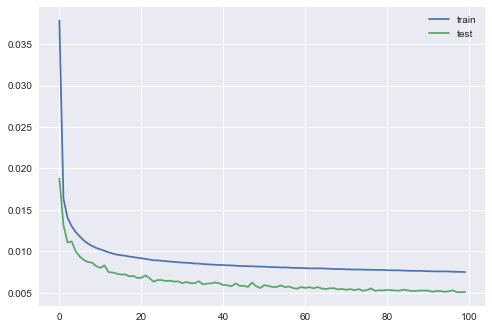

In [50]:
# plot loss
train_log = pd.read_csv('train_log.csv')
plt.plot(train_log['loss'], label='train')
plt.plot(train_log['val_loss'], label='test')
plt.title('Loss vs Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

*Saving the encoder model*

In [51]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

*Getting encoded features from auto-encoder and stack them with previous features*

In [52]:
from tensorflow.keras.models import load_model
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train_prsd)
# encode the test data
X_test_encode = encoder.predict(X_test_prsd)
X_train_final = np.hstack([X_train_prsd,X_train_encode])
X_test_final = np.hstack([X_test_prsd,X_test_encode])

*Loding saved train and test data*

In [3]:
from os import path
if not path.exists('X_train_final.npy'):
    np.save('X_train_final.npy', X_train_final)
else:
    X_train_final = np.load('X_train_final.npy')

if not path.exists('X_test_final.npy'):
    np.save('X_test_final.npy', X_test_final)
else:
    X_test_final = np.load('X_test_final.npy')
    
if not path.exists('y_train.npy'):
    np.save('y_train.npy', y_train)
else:
    y_train = np.load('y_train.npy')
    
if not path.exists('y_test.npy'):
    np.save('y_test.npy', y_test)
else:
    y_test = np.load('y_test.npy')

### Building base line model

*Our base model will give random out within min and max range of target data*

In [54]:
target_tf = TargetTransform('log')
min_y = y_train.min()
max_y = y_train.max()
y_train_predict = target_tf.transform(np.random.uniform(min_y,max_y,y_train.shape[0]))
y_test_predict = target_tf.transform(np.random.uniform(min_y,max_y,y_test.shape[0]))
print('Train mean_absolute_error: ', mean_absolute_error(
    y_train, target_tf.inverse_transform(y_train_predict)))
print('Test mean_absolute_error: ', mean_absolute_error(
    y_test, target_tf.inverse_transform(y_test_predict)))

Train mean_absolute_error:  57596.88928988196
Test mean_absolute_error:  57654.19549458588


### Finding and key take aways

- Dataset has mix of categorical and numerical features.
- There are very large no of categorical features as compared to numerical features.
- Dataset feature label has no real world meanings
- Dataset has no null values 
- Target variable is has as pareto distribution.
- Different categorical features have different cardinality.
- Based on the cardinality applied one-hot, binary and target encoding for categorical features.
- Each categorical features has fews categories dominating in number compared to others. These categories point towards lower values of loss
- Although there are very few continuous feature in dataset but feature importance is high.
- Most continuous features have uniform like distribution.
- We performed log-transform on target variable to make it uniform-like distribution.
- We applied standard scaler on our target encoder feature.
- We used auto-encoder for creating new features. 50 newly created features added to existing features.
- Our base-line model is a random number generating model.

### Models creation

#### SGDRegressor

In [19]:
from sklearn.linear_model import SGDRegressor
target_tf = TargetTransform('log')

model=SGDRegressor(loss='squared_loss', penalty='l2', alpha=10,random_state=10)
model.fit(X_train_final,target_tf.transform(y_train))
y_train_predict = model.predict(X_train_final)
y_test_predict = model.predict(X_test_final)

print('Train mean_absolute_error: ', mean_absolute_error(
    y_train, target_tf.inverse_transform(y_train_predict)))
print('Test mean_absolute_error: ', mean_absolute_error(
    y_test, target_tf.inverse_transform(y_test_predict)))

Train mean_absolute_error:  2902.6017874230592
Test mean_absolute_error:  2904.810382355614


#### RandomForestRegressor 

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=14,
                              min_samples_split=200, min_samples_leaf=100,
                              oob_score=True, n_jobs=-1, random_state=10,
                              max_samples=0.2)
rf_reg.fit(X_train_final,np.log(y_train))
y_train_predict = rf_reg.predict(X_train_final)
y_test_predict = rf_reg.predict(X_test_final)

print('Train mean_absolute_error: ', mean_absolute_error(
    y_train, np.exp(y_train_predict)))
print('Test mean_absolute_error: ', mean_absolute_error(
    y_test, np.exp(y_test_predict)))

Train mean_absolute_error:  1259.4171183552403
Test mean_absolute_error:  1285.4926969912592


### Gradient Boosted Decision Trees

In [6]:
xgb = XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,
                         booster='gbtree',
                         learning_rate=0.1,
                         max_depth=8,
                         gamma=0,
                         subsample=0.7,
                         min_child_weight=7,
                         colsample_bytree=0.7,
                         random_state=10,
                         n_jobs=-1)
xgb.fit(X_train_final, np.log(y_train))
y_train_predict = xgb.predict(X_train_final)
y_test_predict = xgb.predict(X_test_final)

print('Train mean_absolute_error: ', mean_absolute_error(
    y_train, np.exp(y_train_predict)))
print('Test mean_absolute_error: ', mean_absolute_error(
    y_test, np.exp(y_test_predict)))

Train mean_absolute_error:  1051.1750991883641
Test mean_absolute_error:  1177.6184860198377
